In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Load the data
data = pd.read_csv('HR_Analytics.csv')

#Drop columns that should not be a part of the model
#Every employee is over 18, employee number is not as meaningful as years at the company, employee count is 1 for every entry
#MonthlyRate, DailyRate, and HourlyRate are all columns to represent the same thing, so only using monthly salary
data.drop(['Over18', 'EmployeeNumber', 'EmployeeCount','StandardHours','MonthlyRate','DailyRate','HourlyRate'], axis=1, inplace=True)

# Display basic information
data.describe()
data.head()
data.nunique()


Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data
X = data.drop('Attrition', axis=1)  # Assuming 'Attrition' is the target variable
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y)#, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier()#n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[308   6]
 [ 44  10]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       314
           1       0.62      0.19      0.29        54

    accuracy                           0.86       368
   macro avg       0.75      0.58      0.61       368
weighted avg       0.84      0.86      0.83       368



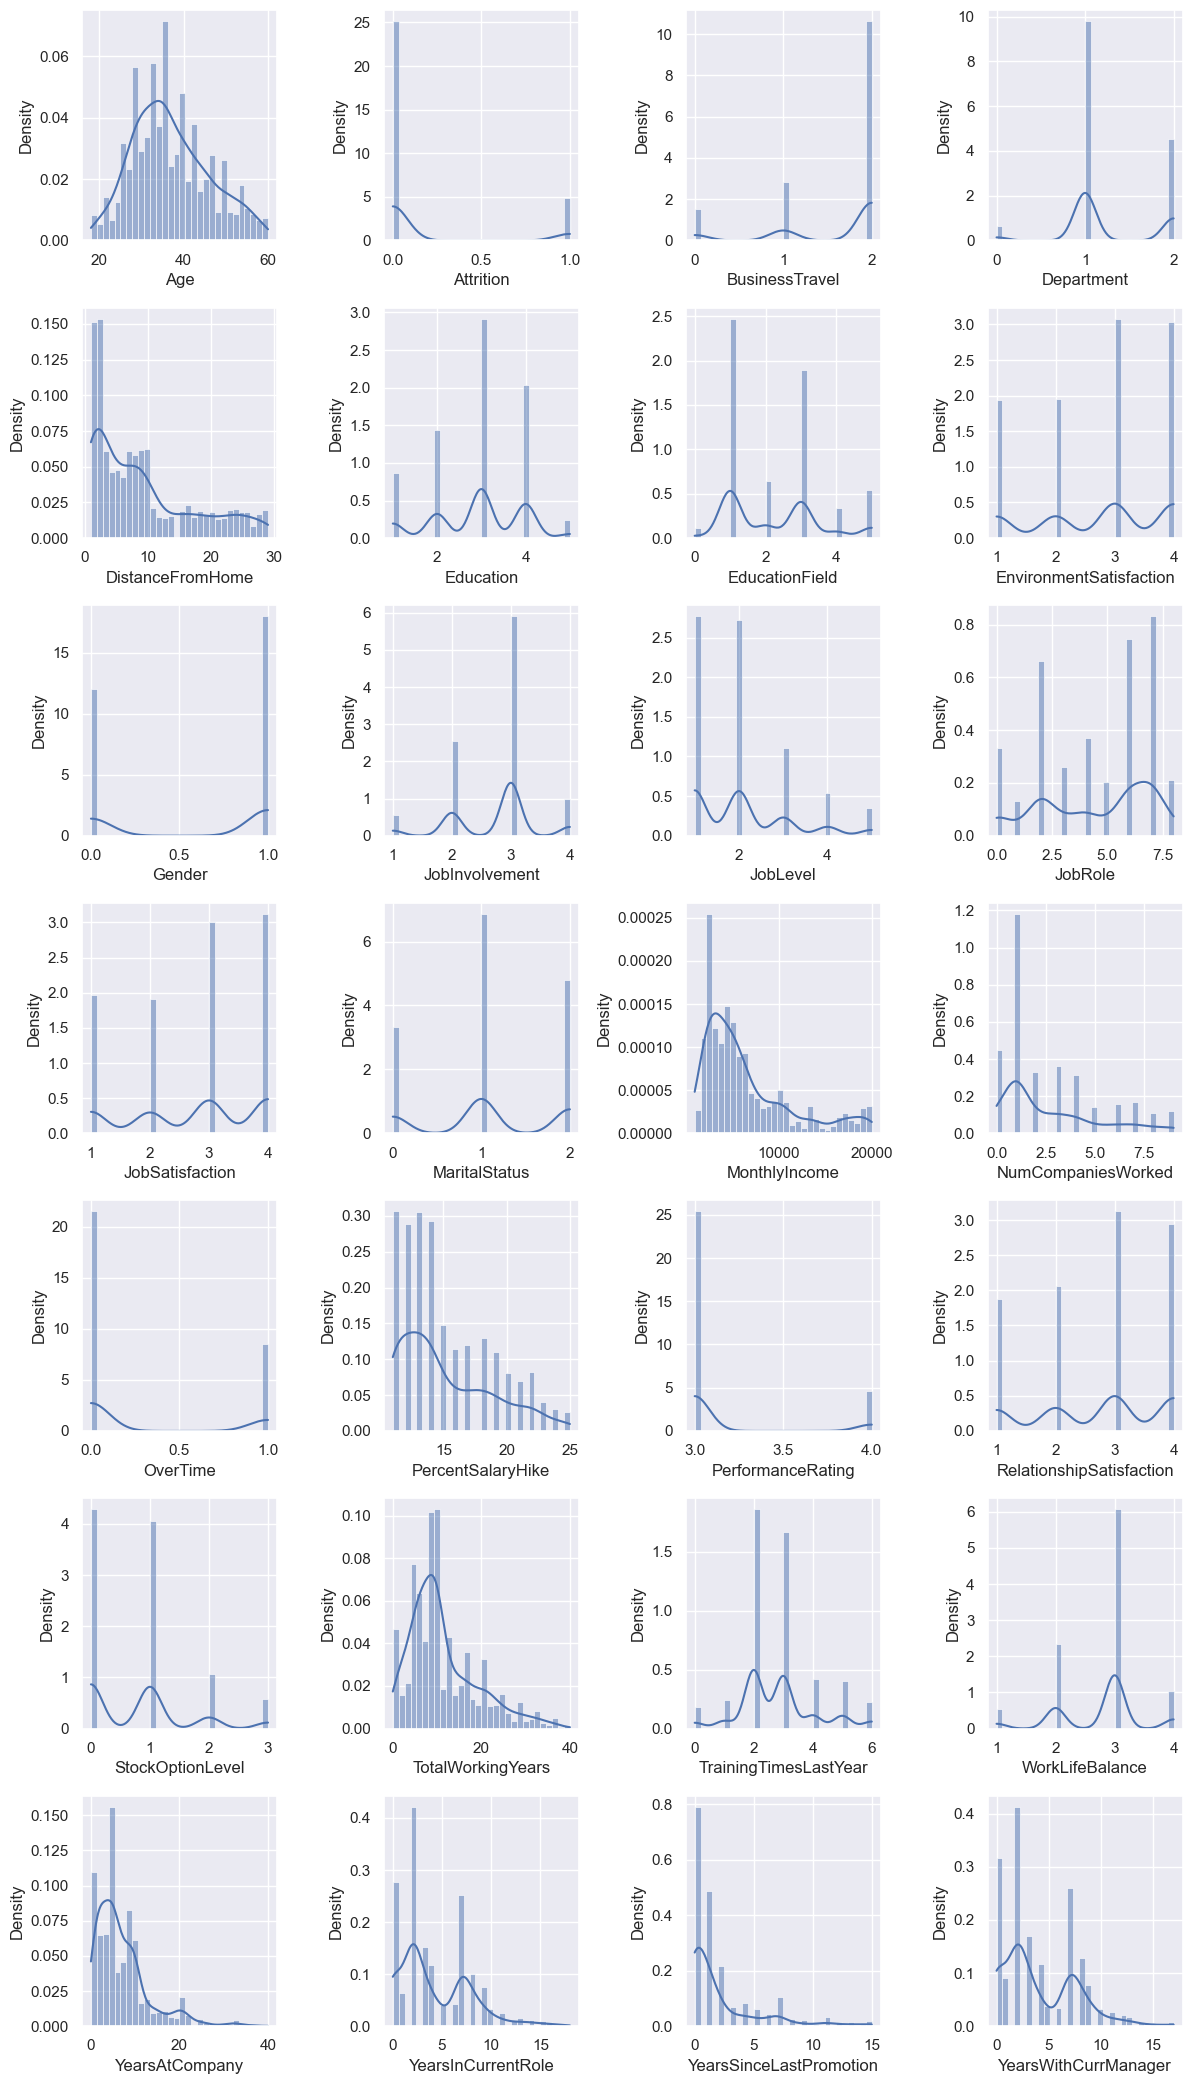

In [13]:
emp_eda = data.copy()
num_cols_eda = [n for n in emp_eda.columns if emp_eda[n].dtypes!='O']

# Calculate the number of rows needed for subplots
num_rows = (len(num_cols_eda) + 3) // 4  # Round up to the nearest multiple of 4

fig, ax = plt.subplots(num_rows, 4, figsize=(12, 3 * num_rows))  # Adjust figure height based on rows
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    sns.histplot(emp_eda[col],kde=True,stat='density',bins=30,ax=ax[i])

# Hide any unused subplots
for i in range(len(num_cols_eda), num_rows * 4):
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

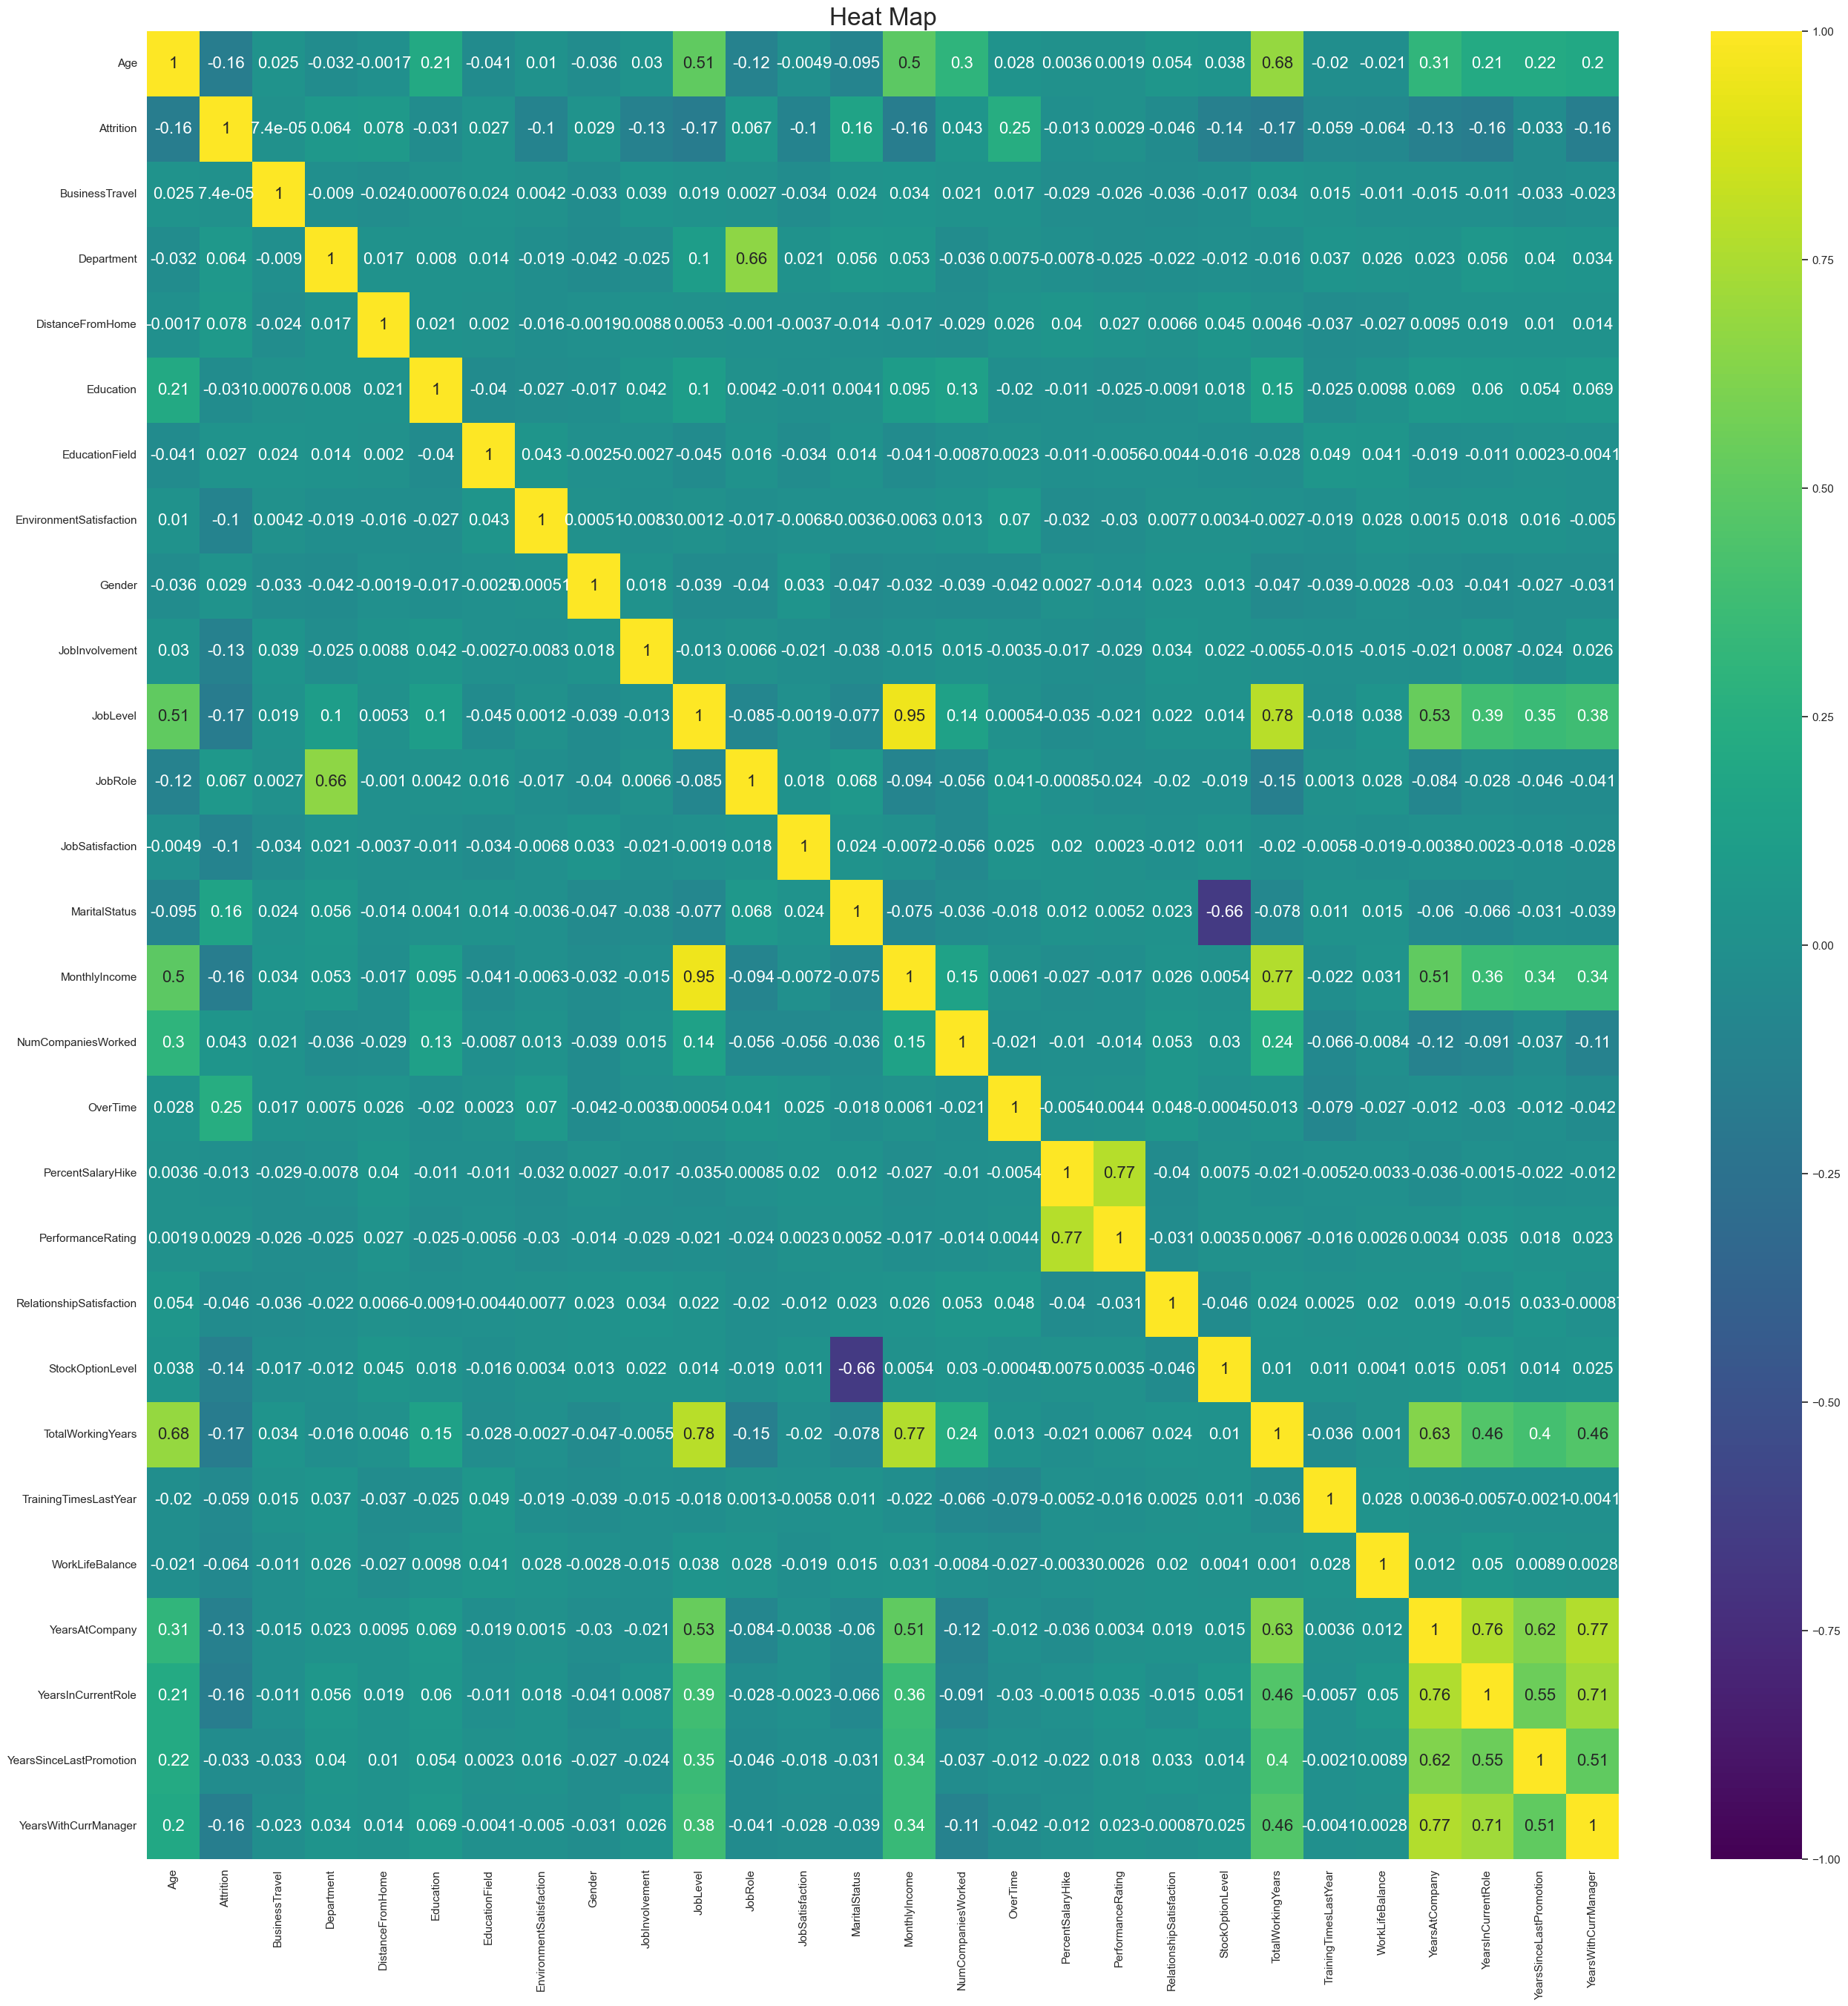

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(32,32))
plt.title('Heat Map', size=24)
sns.set(font_scale=1)
ax = sns.heatmap(emp_eda[num_cols_eda].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1, annot_kws={"size": 16})
plt.show()

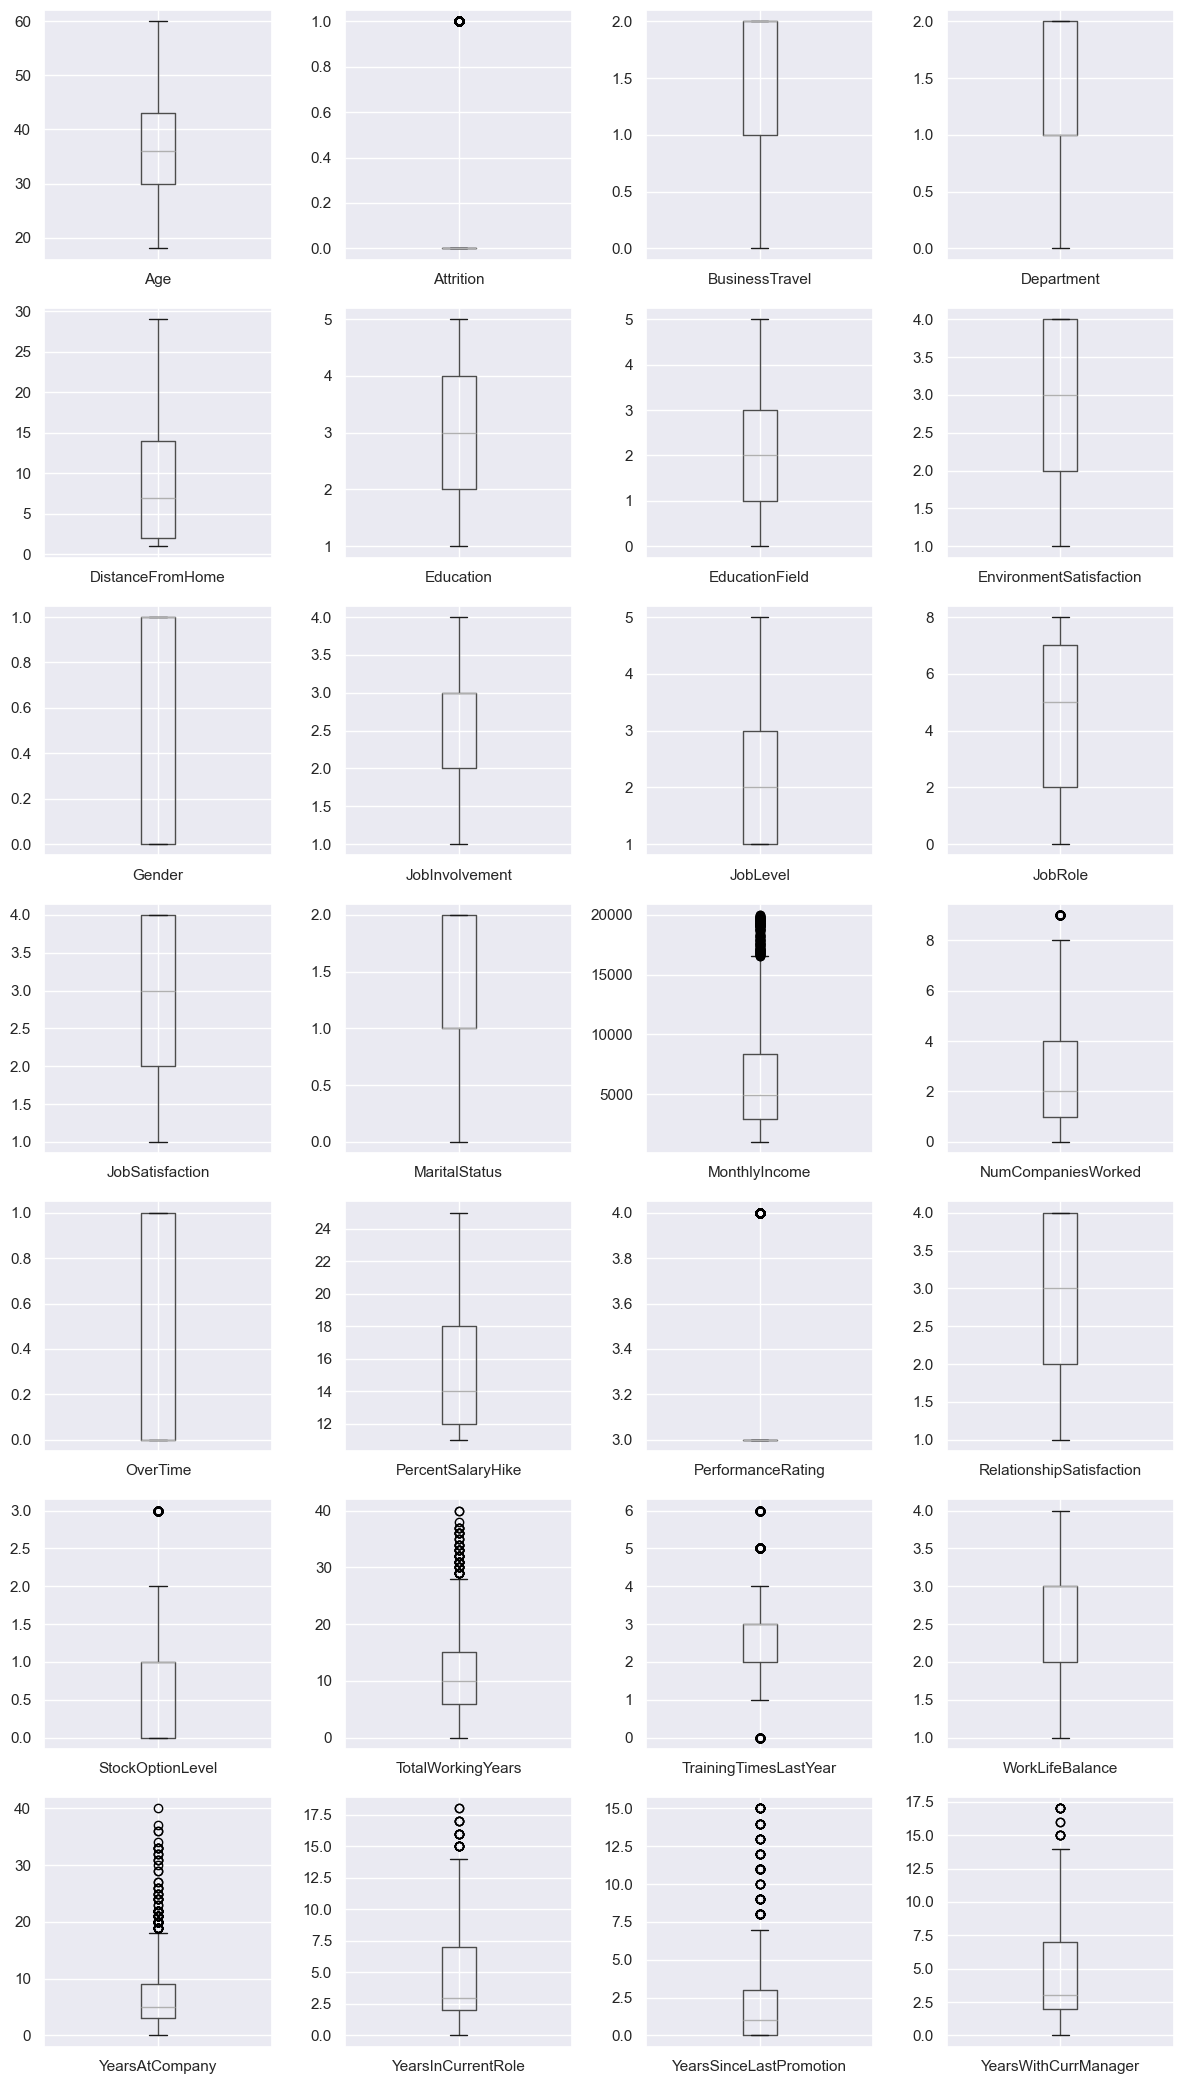

In [15]:
fig, ax = plt.subplots(7, 4, figsize=(12, 21)) #Increase the number of subplots to accommodate all columns
ax = ax.flatten()

for i, col in enumerate(num_cols_eda):
    emp_eda.boxplot(col, ax=ax[i])

# Hide any unused subplots
for i in range(len(num_cols_eda), 7 * 4): # Adjust the range for the increased subplots
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
from IPython.display import HTML, display

display(HTML('''<style>
    .widget-label { min-width: 30ex !important; }
</style>'''))
# Create input widgets
input_widgets = {}
for column in X.columns:
    if column in label_encoders:
        options = label_encoders[column].classes_
        widget = widgets.Dropdown(options=options, description=column)
    else:
        widget = widgets.FloatText(description=column)
    input_widgets[column] = widget

# Display input form
input_form = widgets.VBox(list(input_widgets.values()))
display(input_form)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")
output = widgets.Output()


def on_button_clicked(b):
    input_data = {}
    for column, widget in input_widgets.items():
      #Handle categorical widgets and input them as numerical values
      if isinstance(widget, widgets.Dropdown):
        le = LabelEncoder()
        input_data[column] = le.fit_transform([widget.value])[0]
      else:
        input_data[column] = widget.value

    input_df = pd.DataFrame([input_data])
    prediction = rf_model.predict(input_df)[0]

    with output:
        print("Prediction: ", "Attrition" if prediction == 1 else "No Attrition")

predict_button.on_click(on_button_clicked)
display(predict_button, output)


Button(description='Predict', style=ButtonStyle())

Output()